In [1]:
import numpy as np
from math import log
import matplotlib.pyplot as plt

In [25]:
def newton(F, u0, eps = 10 ** -12, h = 10 ** -5):
    u = u0
    dx = np.ones(len(u0))
    i = 0
    fu = np.zeros((len(u0), len(u0)))
    
    while abs(np.min(dx)) > eps :
        #print("Iteration:", i)
        i += 1
        for j in range(len(u0)):
            du = np.zeros((len(u0), 1))
            du[j] = h
            #print(u)
            #print(du)
            #print(u + du)
            val = (F(u + du) - F(u - du)) / (2 * h)
            for k in range(len(u0)):
                fu[j][k]= val[k][0]
        dx = (np.linalg.inv(fu.T) @ F(u))
        u -= dx
    return u
    
def F(u):
    res = np.zeros((N + 2, 1))
    res[0] = u[0]
    res[N] = u[N]
    for i in range(1, N):
        res[i] = (u[i+1] - u[i]) * (k0 + k1 * (u[i]**2 + u[i+1]**2)/2) - (u[i] - u[i-1])*(k0 + k1 * (u[i]**2 + u[i-1]**2)/2) + u[-1]*u[i]*(x[i]-x[i+1])**2
    res[N + 1] = u[N // 2 + 1] - u[N // 2 - 1] - 2 * (x[1] - x[0]) # новое граничное 
    return res

def eitken(U2, U1, U0, r):
    return U2 + (U2 - U1) / ((U1 - U0) / (U2 - U1) - 1)

def effective_p(U2, U1, U0, r):
    return np.log((U2 - U1) / (U1 - U0)) / np.log(r)

def richardson(U1, U0, r, p):
    return (r**(-p) * U1 - U0) / (r**(-p) - 1)

In [26]:
border = (0, 1)
k0 = 1
k1 = 0.5

Ns = [2 ** (3 + i) for i in range(7)]

# сетка сгущается ровна в 2 раза
last_res = np.zeros((Ns[0] // 2, 1))
lambdas = []

for N in Ns:
    x = np.linspace(0, 1, N + 1)
    u0 = np.zeros((N + 2, 1))

    # перенос значений с прошлой сетки
    for i in range(N // 2):
        u0[2 * i] = last_res[i]

    # интерполируем новые узлы средним значением соседних
    for i in range(1, N + 1, 2):
        u0[i] = (u0[i - 1] + u0[i + 1]) / 2
    
    if N == 8:
        # в первом приближении lm = 40
        u0[-1] = 40
        # чтоб u не был нулевым набором
        u0[1] = 0.01
        
    last_res = newton(F, u0)
    #print(last_res)
    #print(N)
    lambdas.append(last_res[-1])

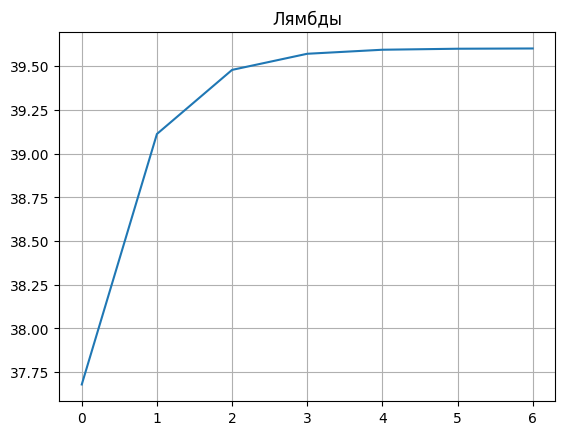

In [27]:
#print([lm[0] for lm in lambdas])
plt.plot([lm[0] for lm in lambdas])
plt.title("Лямбды")
plt.grid(True)

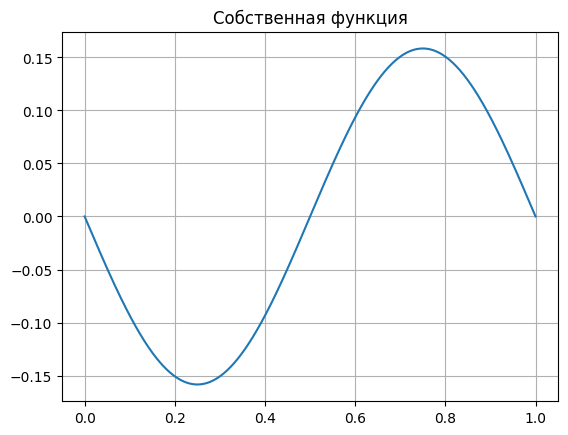

In [28]:
plt.plot(x, [0] + last_res[:-1] + [0])
plt.title("Собственная функция")
plt.grid(True)

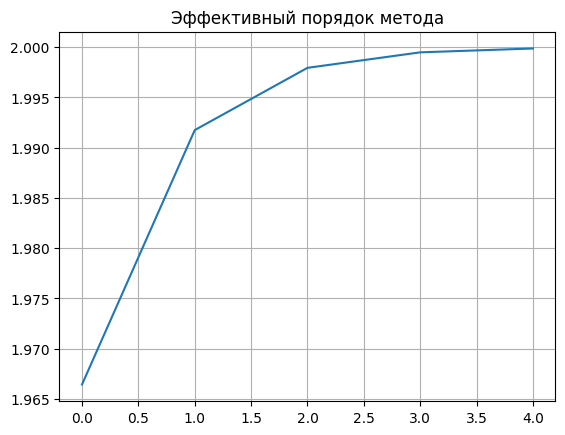

In [32]:
p_vals = [effective_p(lambdas[i], lambdas[i - 1], lambdas[i - 2], 1/2) for i in range(2, len(lambdas))]
plt.plot(p_vals)
plt.title("Эффективный порядок метода")
plt.grid(True)

In [40]:
eitken_vals = [lm[0] for lm in lambdas]
while len(eitken_vals) > 2:
    eitken_vals = [eitken(eitken_vals[i], eitken_vals[i - 1], eitken_vals[i - 2], 1 / 2) for i in range(2, len(eitken_vals))]
print("Eitken lambda = \t", eitken_vals[-1])

richardson_vals = [lm[0] for lm in lambdas]
while len(richardson_vals) > 2:
    p = max([effective_p(richardson_vals[i], richardson_vals[i - 1], richardson_vals[i - 2], 1/2) for i in range(2, len(richardson_vals))])
    richardson_vals = [richardson(richardson_vals[i], richardson_vals[i - 1], 1/2, 2) for i in range(1, len(richardson_vals))]
print("Richardson lambda = \t", richardson_vals[-1])

Eitken lambda = 	 39.60239404276351
Richardson lambda = 	 39.602391118473825
